In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

plt.rcParams["figure.figsize"] = [8, 6]

In [49]:
data = pd.read_stata('data/maketable1.dta')
data.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Income')

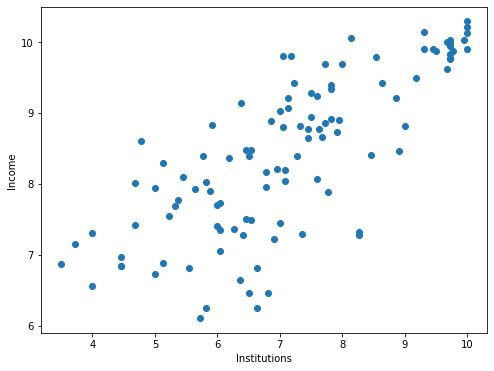

In [50]:
fig, ax = plt.subplots()

ax.scatter(x=data["avexpr"], y=data["logpgp95"])
ax.set_xlabel("Institutions")
ax.set_ylabel("Income")

In [68]:
fit_1 = smf.ols("logpgp95 ~ avexpr", data=data)
fit_1_results = fit_1.fit()
fit_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           4.16e-24
Time:                        10:33:52   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6261      0.301     15.391      0.000       4.030       5.222
avexpr         0.5319      0.041     13.093      0.000       0.451       0.612
==============================================================================
Omnibus:                        9.251   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.170
Skew:                          -0.680   Prob(JB):                       0.0102
Kurtosis:                       3.362   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
fitted_values = fit_1_results.predict()

Text(0, 0.5, 'Income')

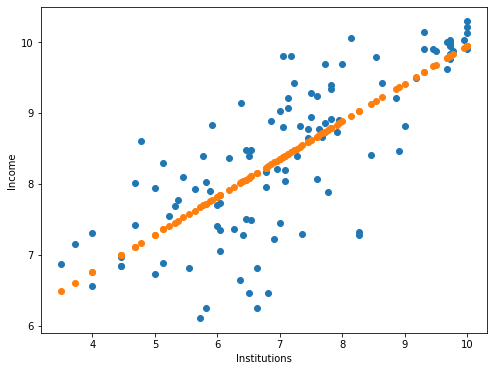

In [55]:
fig, ax = plt.subplots()

plot_data = data[["avexpr", "logpgp95"]].dropna()

ax.scatter(x=plot_data["avexpr"], y=plot_data["logpgp95"])
ax.scatter(x=plot_data["avexpr"], y=fitted_values)
ax.set_xlabel("Institutions")
ax.set_ylabel("Income")

In [61]:
fit_1_results.HC3_se

Intercept    0.243950
avexpr       0.029492
dtype: float64

In [71]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/realwage.csv",
    index_col=0    
)
data.head()

,Time,Country,Series,Pay period,value
0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17132.443
1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18100.918
2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17747.406
3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18580.139
4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18755.832


In [74]:
data["Pay period"].value_counts()

Annual    704
Hourly    704
Name: Pay period, dtype: int64

In [75]:
data.describe()

,value
count,1340.000000
mean,5697.843084
std,7475.920784
min,0.234000
25%,4.388742
50%,290.606495
75%,10501.730500
max,25713.797000


In [103]:
data["Year"] = pd.to_datetime(data["Time"]).dt.year

In [104]:
data.head()

,Time,Country,Series,Pay period,value,Year
0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17132.443,2006
1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18100.918,2007
2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17747.406,2008
3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18580.139,2009
4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18755.832,2010


In [120]:
data.groupby(["Year", "Pay period"])\
    .aggregate(mean_value=("value", "mean"),
               median_value=("value", "median"))\
    .reset_index()

,Year,Pay period,mean_value,median_value
0,2006,Annual,10472.950903,9490.589350
1,2006,Hourly,4.906189,3.986435
2,2007,Annual,10811.633465,10057.229700
3,2007,Hourly,5.062943,4.062435
4,2008,Annual,10962.830316,10286.408000
5,2008,Hourly,5.135955,4.068115
6,2009,Annual,11376.283250,10673.845000
7,2009,Hourly,5.327554,4.338570
8,2010,Annual,11447.280602,10691.136000
9,2010,Hourly,5.360247,4.371560
